### set up

In [2]:
from src import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [3]:
drive_path = r'/Users/vivianguo/Library/CloudStorage/GoogleDrive-vg2586@columbia.edu/共享云端硬盘/' 
base_path = 'ColumbiaProject2025/RunsWithTimeStamps'
run_dir = os.path.join(drive_path, base_path)
directory = '20250827_1128_Nasdaq_1530'

In [47]:
def excess_return(df):
    position = np.array([ -1 if 'short' in c else 1 for c in df.columns if c != 'price' ])
    df1 = df.iloc[1::2].reset_index(drop=True) - df.iloc[::2].reset_index(drop=True)
    df1.index = df.index[1::2].date

    market = df1['price'].cumsum()
    pnl = df1.drop(columns=['price']).cumsum()

    traded = (df1.drop(columns=['price']) != 0).astype(int)
    traded_days = traded.cumsum().replace(0, np.nan)

    market_days = ((market != 0).astype(int)).cumsum().replace(0, np.nan)
    ret = pnl / traded_days - (market.values.reshape(-1,1) / market_days.values.reshape(-1,1)) * position

    return ret

### data

In [6]:
df = read_parquet_dir(os.path.join(run_dir, directory), daily = True, price = True, begin = pd.Timestamp('15:30'), end = pd.Timestamp('16:00'))

In [48]:
ret = excess_return(df)
ret.fillna(0, inplace=True)
ret

,0_long,1_long,2_short,3_short,4_long,5_long,6_long,7_long,8_long,9_short,...,257_long,258_long,259_long,260_long,261_long,262_short,263_short,264_short,265_short,naive_ave_pnl
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,19.184159,9.677367,23.899386,37.255574,29.472367,15.536829,13.740224,46.520444,8.128617,43.948318,...,12.886187,10.668795,44.870094,30.003027,3.915549,44.301235,29.330219,52.674785,35.478263,2.172397
2025-07-08,19.183256,9.676464,23.900290,37.256478,29.471464,15.535926,13.739321,46.519541,8.172019,43.949222,...,12.885284,10.667892,44.274241,29.890856,3.914645,44.302138,29.331123,52.675688,35.479167,2.171079
2025-07-09,19.179800,9.673007,23.903746,37.259934,29.468007,15.532469,13.735864,47.389304,8.442565,43.952678,...,12.881827,10.664436,44.270785,30.259674,4.507422,44.305594,29.334579,52.679145,35.482623,2.168143
2025-07-10,18.866857,9.676180,23.900573,37.256761,29.471180,15.535642,13.739037,47.392477,8.122612,43.949505,...,12.885000,10.667609,44.273958,29.389758,3.890823,44.302421,29.331406,52.675972,35.479450,2.166746


In [40]:
df1 = df.iloc[1::2]
df1 = df1.drop(columns=['price'])
df1.index = df1.index.date
df1

,0_long,1_long,2_short,3_short,4_long,5_long,6_long,7_long,8_long,9_short,...,257_long,258_long,259_long,260_long,261_long,262_short,263_short,264_short,265_short,naive_ave_pnl
2006-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2006-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2006-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2006-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1799.0,8677.0,...,2059.0,518.0,1970.0,3170.0,420.0,6349.0,4267.0,4169.0,8467.0,3266.097744
2025-07-08,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1207.0,1817.0,8677.0,...,2059.0,518.0,1988.0,3188.0,420.0,6349.0,4267.0,4169.0,8467.0,3267.518797
2025-07-09,5058.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1887.0,8677.0,...,2059.0,518.0,1988.0,3258.0,490.0,6349.0,4267.0,4169.0,8467.0,3270.413534
2025-07-10,4993.0,3353.0,7391.0,1270.0,2350.0,3443.0,1146.0,1277.0,1822.0,8677.0,...,2059.0,518.0,1988.0,3193.0,425.0,6349.0,4267.0,4169.0,8467.0,3265.281955


## simple ranking

In [9]:
expandings = expanding_window(df1, 1, chunk = True)

In [10]:
expandings_metrics = compute_rolling_metrics(expandings, ret)

In [11]:
expandings_metrics['0_long']

,mdd,ldd,cddDays,calmar,sharpe,excess_ret
timestamp,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-07-07,456.0,491.0,0.0,11.092105,20.388373,19.184159
2025-07-08,456.0,491.0,0.0,11.092105,20.359430,19.183256
2025-07-09,456.0,491.0,0.0,11.092105,20.330795,19.179800


In [12]:
import copy
EIs = compute_EI(copy.deepcopy(expandings_metrics), alpha = 0.02)
EIs

,0_long,1_long,2_short,3_short,4_long,5_long,6_long,7_long,8_long,9_short,...,257_long,258_long,259_long,260_long,261_long,262_short,263_short,264_short,265_short,naive_ave_pnl
timestamp,,,,,,,,,,,,,,,,,,,,,
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,0.537182,0.293587,0.630394,0.471446,0.352627,0.649329,0.299058,0.507230,0.459263,0.456829,...,0.282858,0.187662,0.459992,0.345496,0.103307,0.266684,0.272868,0.308234,0.421164,0.494101
2025-07-08,0.536884,0.293318,0.630392,0.471164,0.352620,0.649304,0.299010,0.507228,0.458964,0.456845,...,0.282837,0.187634,0.458455,0.345057,0.103273,0.265499,0.272744,0.308175,0.420999,0.494106
2025-07-09,0.536589,0.292964,0.630391,0.470881,0.352613,0.649278,0.298889,0.507852,0.458800,0.456863,...,0.282750,0.187593,0.458132,0.345883,0.115955,0.264313,0.272646,0.308129,0.420833,0.494113


### Visualization

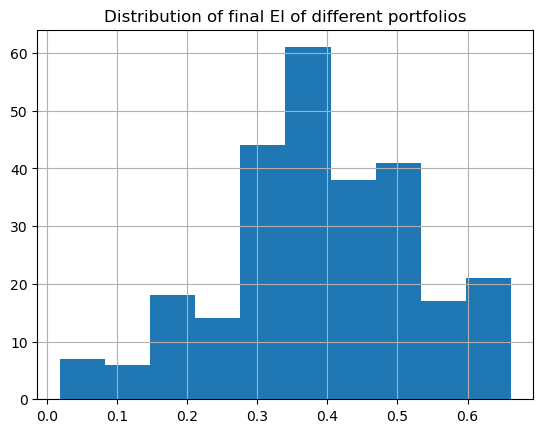

In [13]:
final_EI = EIs.iloc[-1]
final_EI.hist()
plt.title('Distribution of final EI of different portfolios')
plt.show()

In [14]:
import random

In [15]:
df1.fillna(0, inplace=True)

In [ ]:
EI_bins = pd.qcut(final_EI, q=3, labels=False)

for t in range(100):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i in range(3,-1, -1):
        cols = list(EI_bins[EI_bins == i].index)
        if len(cols) == 0:
            continue
    
        col = random.choice(cols)
        pnl = df1[col]
    
        l = len(pnl.index)
        ax.plot(pnl.index[int(l/4):], pnl[int(l/4):], label=f"EI={final_EI[col]:.2f}")

    ax.set_ylabel("PnL")
    ax.set_xlabel("Time")
    ax.set_title("Random Generated PnL Curves from Each EI Quartile")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(f'./outputs/RandomGeneratedPnLCurves_{t}.png')

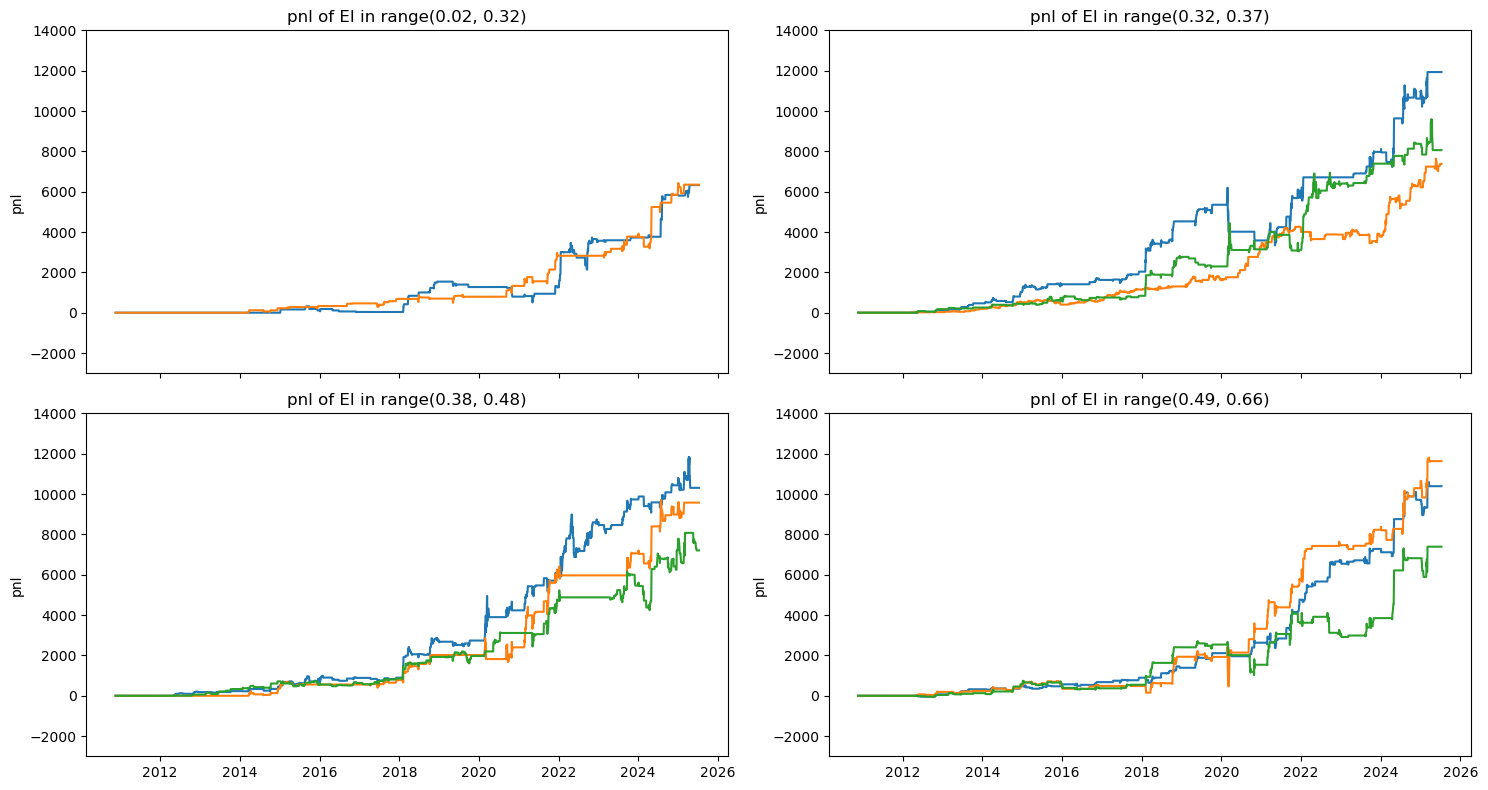

In [94]:
EI_bins = pd.qcut(final_EI, q=4, labels=False)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

for i in range(4):
    ax = axes[int(i/2)][i%2]
    cols = list(EI_bins[EI_bins == i].index)
    random.shuffle(cols)
    temp = df1[cols]

    count = 0
    for col in cols:
        if count > 2:
            break
        if temp[col].iloc[-1] > 6300:
            l = len(temp.index)
            ax.plot(temp.index[int(l/4):], temp[col][int(l/4):])
            count += 1
    ax.set_ylabel(f'pnl')
    ax.tick_params(axis='y')
    ax.set_ylim(-3000, 14000)
    ax.set_title(f'pnl of EI in range({round(final_EI[cols].min(), 2)}, {round(final_EI[cols].max(), 2)})')

plt.tight_layout()
plt.show()

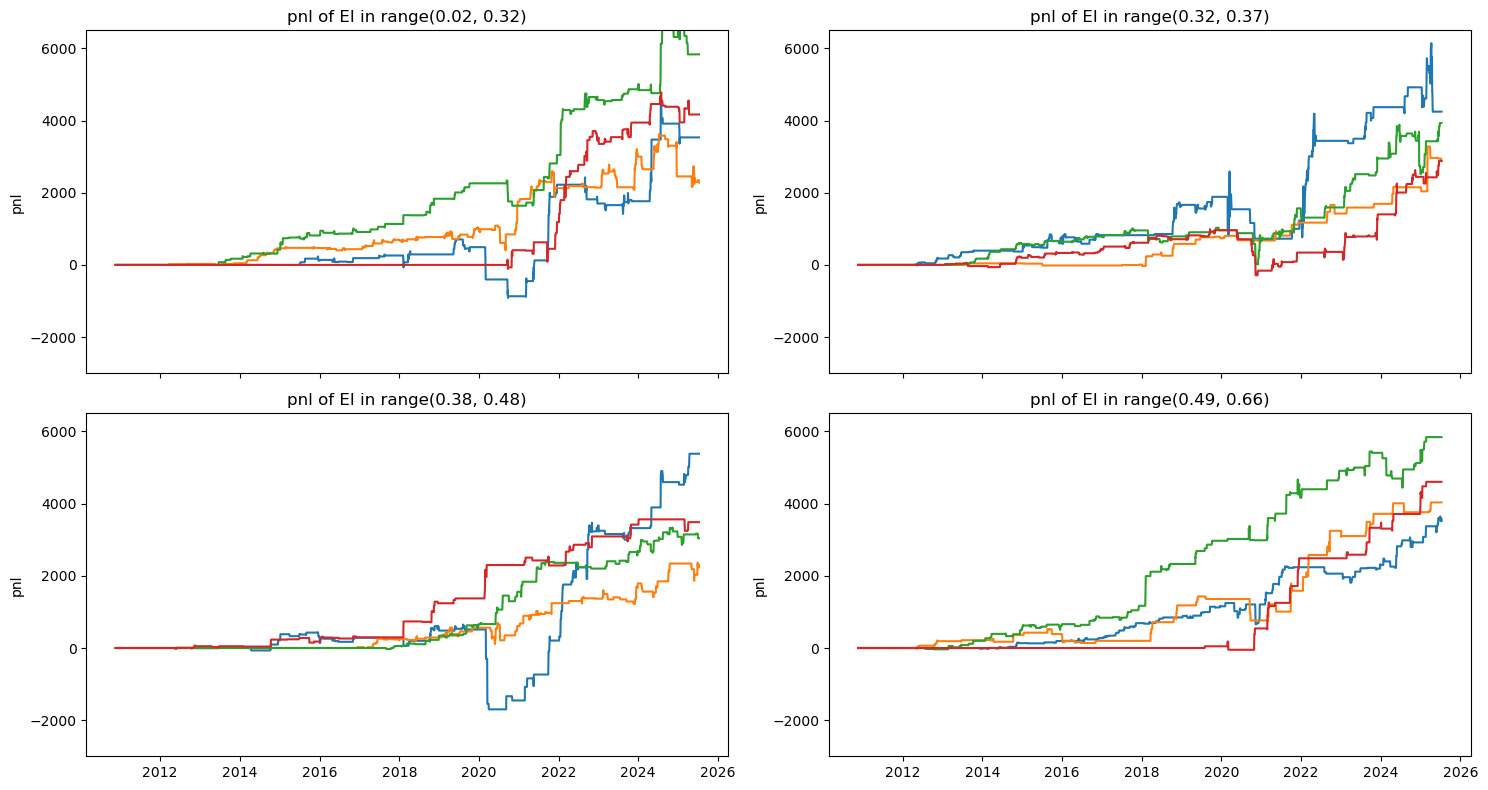

In [102]:
EI_bins = pd.qcut(final_EI, q=4, labels=False)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

for i in range(4):
    ax = axes[int(i/2)][i%2]
    cols = list(EI_bins[EI_bins == i].index)
    random.shuffle(cols)
    
    temp = df1[cols]

    count = 0
    for col in cols:
        if count > 3:
            break
        if temp[col].iloc[-1] < 6300 and temp[col].iloc[-1] > 2000:
            l = len(temp.index)
            ax.plot(temp.index[int(l/4):], temp[col][int(l/4):])
            count += 1
    ax.set_ylabel(f'pnl')
    ax.tick_params(axis='y')
    ax.set_ylim(-3000, 6500)
    ax.set_title(f'pnl of EI in range({round(final_EI[cols].min(), 2)}, {round(final_EI[cols].max(), 2)})')

plt.tight_layout()
plt.show()

In [21]:
from numpy import sqrt, maximum, ones, array, quantile, log, exp, nan, ndarray, isnan
def sharpe(dailyReturns: pd.Series) -> float:
    idx = dailyReturns.first_valid_index()
    if idx is None:
        return nan
    dailyReturns = dailyReturns[idx:]
    stdev = dailyReturns.std()
    if stdev == 0:
        return 0.0
    return dailyReturns.mean() / stdev * sqrt(252)

def mdd(cumpnl: pd.Series) -> float:
    idx = cumpnl.first_valid_index()
    if idx is None:
        return nan
    cumpnl = cumpnl[idx:]
    arr = cumpnl.to_numpy()
    top = maximum.accumulate(arr)
    return (top - cumpnl).max()

def calmar(cumpnl: pd.Series) -> float:
    maxDD = mdd(cumpnl)
    if maxDD == 0:
        return 100.0
    # sometimes maxDD can be 0, so its capped at 100 to avoid division by 0
    return min(cumpnl.iloc[-1]/maxDD, 100)

In [23]:
new_weights = EIs[EIs.columns.difference(['naive_ave_pnl'])].copy()
new_weights = new_weights.div(new_weights.sum(axis = 1), axis = 0)
new_weights

simple_rankings = df1[df1.columns.difference(['price', 'naive_ave_pnl'])].mul(new_weights)
simple_rankings_pnl = simple_rankings.sum(axis=1)
sharpe_naive = sharpe(df1['naive_ave_pnl'])
sharpe_simple = sharpe(simple_rankings_pnl)
calmar_naive = calmar(df1['naive_ave_pnl'])
calmar_simple = calmar(simple_rankings_pnl)

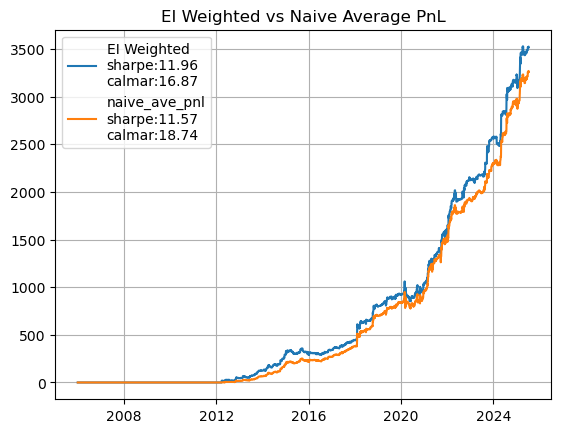

In [24]:
plt.plot(simple_rankings.index, simple_rankings_pnl, label = 'EI Weighted\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_simple, calmar_simple))
plt.plot(df1.index, df1['naive_ave_pnl'], label = 'naive_ave_pnl\nsharpe:{:.2f}\ncalmar:{:.2f}'.format(sharpe_naive, calmar_naive))
plt.legend()
plt.title('EI Weighted vs Naive Average PnL')
plt.grid()
plt.show()

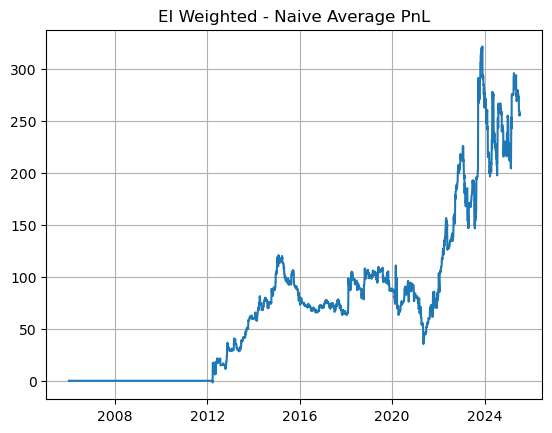

In [104]:
plt.plot(simple_rankings.index, simple_rankings.sum(axis=1) - df1['naive_ave_pnl'])
plt.title('EI Weighted - Naive Average PnL')
plt.grid()
plt.show()